In [1482]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.interpolate as si
import scipy.constants as sc
import scipy.optimize as so
import matplotlib as mpl
from matplotlib import cm

key="full_width_g"

if key == "full_width_g":
    w=4.7
    h=w/1.618

if key == "insert":
    w=4.7/2*(30/41)
#    h=w/1.618
    h=2*30/41

if key == "half_width_g":
    w=4.7/2
#    h=w/1.618
    h=2
if key == "full_width_10":
    w=4.7
    h=8

mpl.rcParams['figure.figsize'] = [w, h]
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

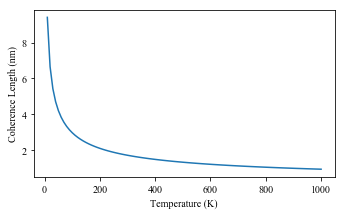

In [1509]:
def Lc(T):
    return sc.hbar/np.sqrt(sc.k*sc.m_e*T)

T=np.linspace(10,1000,100)

fig=plt.figure()

plt.plot(T, Lc(T)*1E9)
fig.tight_layout()
plt.xlabel('Temperature (K)')
plt.ylabel('Coherence Length (nm)')
plt.savefig('coherence_temp.pdf',bbox_inches='tight')

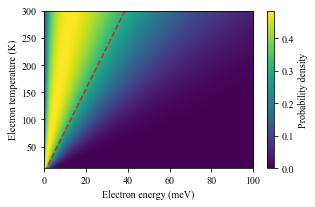

In [1512]:
from mpl_toolkits.mplot3d import Axes3D

def sig_E(T):
    return np.sqrt(15/4*np.sqrt(1/(sc.k*T))*(sc.k*T)**(3/2)/sc.e)

def f_E(E,T):
    E=E*sc.e
    return 2/np.sqrt(sc.pi)*(E/(sc.k*T))**.5*np.exp(-E/(sc.k*T))

T=np.linspace(300,10,1000)
E=np.linspace(0,.1,1000)

e,t=np.meshgrid(E,T)

plt.imshow(f_E(e,t),aspect='auto',extent=[min(E)*1E3,max(E)*1E3,min(T),max(T)])
# plt.plot(E,f_E(E,100))
plt.plot(((3/2*sc.k*T)/sc.e)*1E3,T,'--',color='C3')
plt.colorbar(label='Probability density')
plt.ylabel('Electron temperature (K)')
plt.xlabel('Electron energy (meV)')
plt.savefig('energy_spread_temp.pdf',bbox_inches='tight')